In [1]:
#1. Get a rough idea of the data
# Import necessary libraries
from sequenzo import *  # Sequenzo package
import pandas as pd     # Data manipulation


In [2]:
#import pandas as pd
df = pd.read_csv('/Users/lei/Documents/japan_romance/sohee/sequence_data.csv')
df

,PID,25m01,25m02,25m03,25m04,25m05,25m06,25m07,25m08,25m09,...,35m05,35m06,35m07,35m08,35m09,35m10,35m11,35m12,race,sex
0,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,3,2
1,3,6.0,6.0,6.0,5.0,5.0,5.0,1.0,1.0,1.0,...,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3,2
2,4,5.0,5.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,2
3,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,1
4,8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,12515,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2
6572,12516,6.0,6.0,6.0,6.0,5.0,6.0,6.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
6573,12517,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1
6574,12558,5.0,5.0,5.0,5.0,6.0,5.0,6.0,3.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,2,2


In [3]:
time_list = list(df.columns)[1:121]
states = [1.0,2.0,3.0,4.0,5.0,6.0]
# states = ['FT+WC', 'FT+BC', 'PT+WC','PT+BC', 'U', 'OLF']
labels = ['FT+WC', 'FT+BC', 'PT+WC','PT+BC', 'U', 'OLF']
sequence_data = SequenceData(df, 
                             time=time_list, 
                             time_type = "age", 
                             states=states, 
                             labels = labels,
                             id_col = 'PID'
                             )

sequence_data



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 6576
[>] Number of time points: 120
[>] Min/Max sequence length: 15 / 120
[>] There are 4354 missing values across 472 sequences.
    First few missing sequence IDs: [11, 33, 82, 95, 141, 144, 150, 156, 229, 253] ...
[>] Top sequences with the most missing time points:
    (Each row shows a sequence ID and its number of missing values)

             Missing Count
Sequence ID               
4415                   105
7574                    69
3449                    60
8232                    56
6099                    55
[>] States: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 'Missing']


SequenceData(6576 sequences, States: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 'Missing'])

In [4]:
df = wide_to_long_format_data(df, id_col='PID', time_cols=time_list)
df



,PID,time,state
0,2,25m01,1.0
1,3,25m01,6.0
2,4,25m01,5.0
3,6,25m01,1.0
4,8,25m01,1.0
...,...,...,...
789115,12515,34m12,6.0
789116,12516,34m12,6.0
789117,12517,34m12,2.0
789118,12558,34m12,5.0


In [5]:
long_to_wide_format_data(df=df, 
                             id_col='PID', 
                             time_col='time', 
                             value_col='state')

,PID,25m01,25m02,25m03,25m04,25m05,25m06,25m07,25m08,25m09,...,34m03,34m04,34m05,34m06,34m07,34m08,34m09,34m10,34m11,34m12
0,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,3,6.0,6.0,6.0,5.0,5.0,5.0,1.0,1.0,1.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
2,4,5.0,5.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,12515,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,2.0,2.0,2.0,2.0,2.0,6.0,6.0,6.0,6.0,6.0
6572,12516,6.0,6.0,6.0,6.0,5.0,6.0,6.0,2.0,2.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
6573,12517,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,6.0,...,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
6574,12558,5.0,5.0,5.0,5.0,6.0,5.0,6.0,3.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0


🔍 Missing Value Summary
----------------------------------------
[Columns with Missing Values]
       Missing Count  Missing (%)
29m09             51         0.78
29m12             51         0.78
29m08             51         0.78
29m07             51         0.78
28m10             49         0.75
...              ...          ...
25m11             25         0.38
25m02             22         0.33
26m01             22         0.33
25m12             22         0.33
25m01             19         0.29

[120 rows x 2 columns]

[Top 5 Rows with Most Missing Values]
      Missing Count
3020            105
4876             69
2348             60
5208             56
4134             55


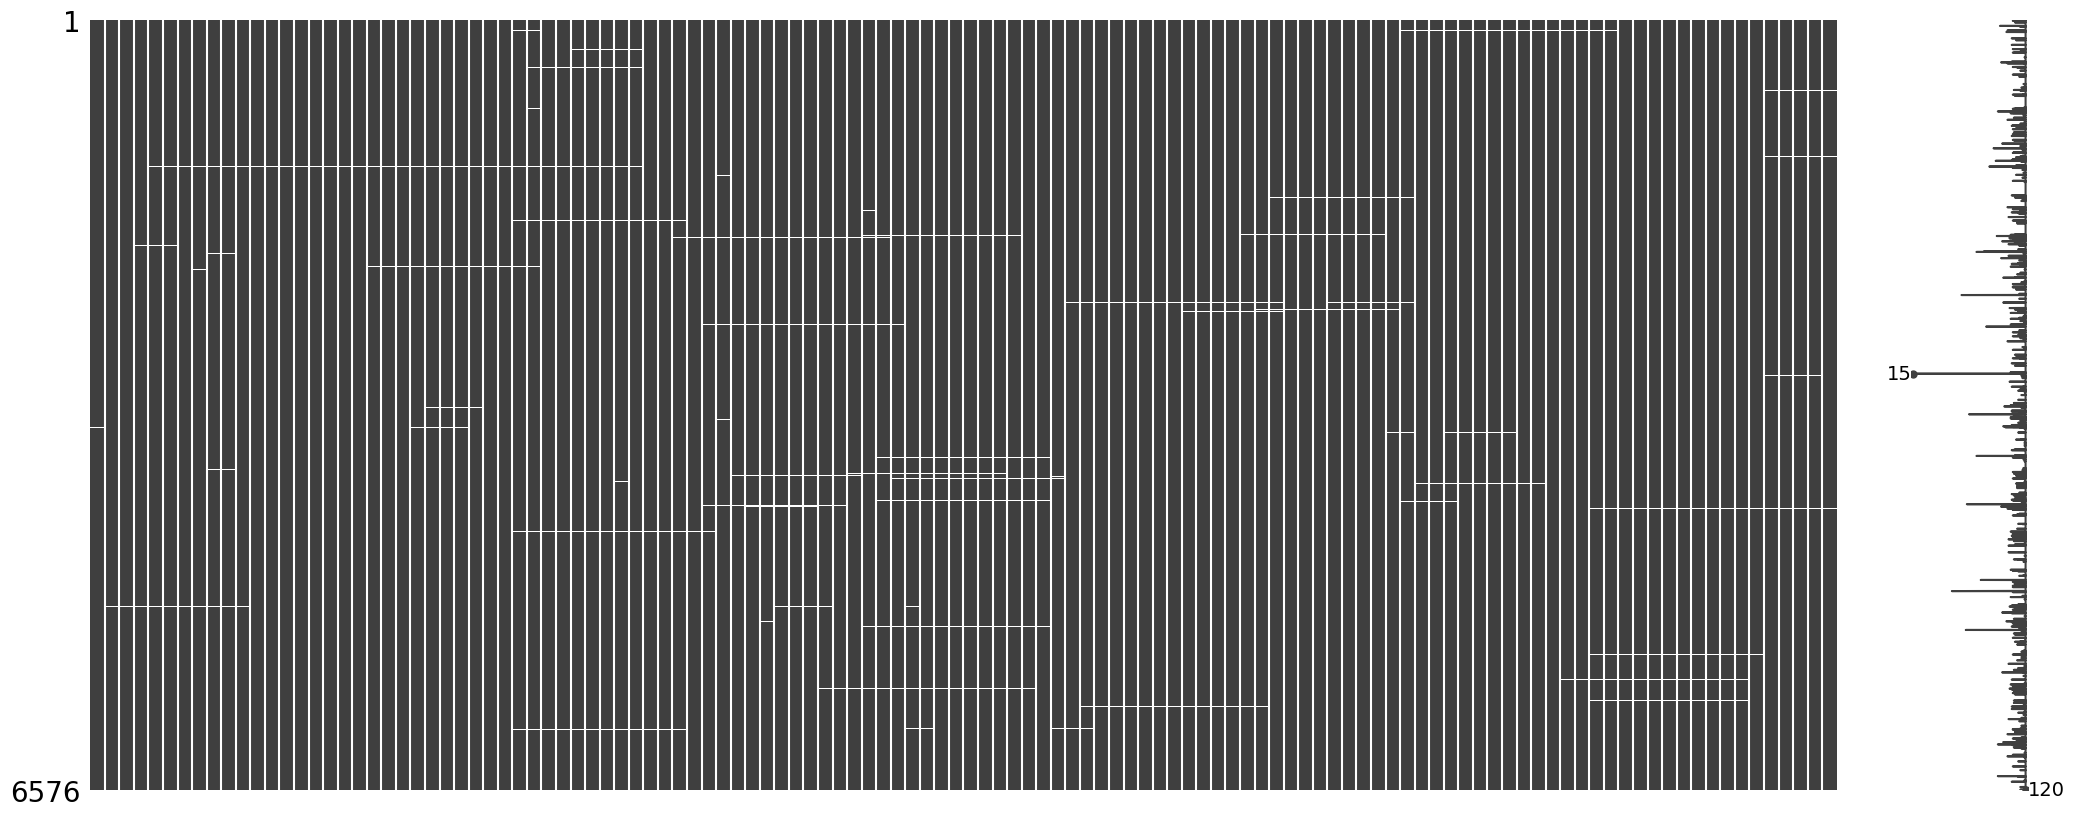

In [5]:
summarize_missing_values(df, columns=time_list)


🔍 Missing Value Summary
----------------------------------------
[Columns with Missing Values]
       Missing Count  Missing (%)
29m09             51         0.78
29m12             51         0.78
29m08             51         0.78
29m07             51         0.78
28m10             49         0.75
...              ...          ...
25m11             25         0.38
25m02             22         0.33
26m01             22         0.33
25m12             22         0.33
25m01             19         0.29

[120 rows x 2 columns]

[Top 5 Rows with Most Missing Values]
      Missing Count
3020            105
4876             69
2348             60
5208             56
4134             55


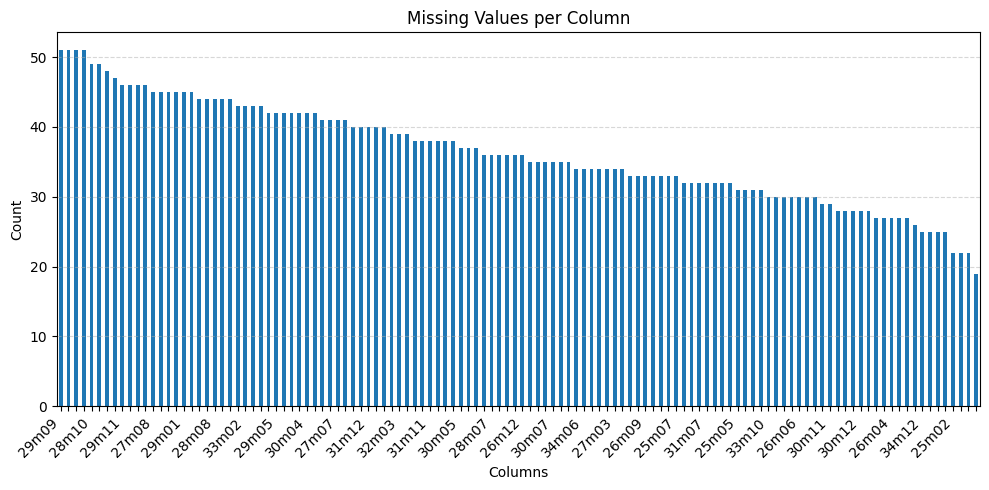

In [4]:
summarize_missing_values(df, columns=time_list, mode='bar')

🔍 Missing Value Summary
----------------------------------------
[Columns with Missing Values]
       Missing Count  Missing (%)
35m03           1698        25.82
35m06           1698        25.82
35m02           1697        25.81
35m01           1697        25.81
35m09           1697        25.81
...              ...          ...
31m03             25         0.38
25m12             22         0.33
26m01             22         0.33
25m02             22         0.33
25m01             19         0.29

[132 rows x 2 columns]

[Top 5 Rows with Most Missing Values]
      Missing Count
3020            117
4876             81
5208             68
3366             65
2348             60


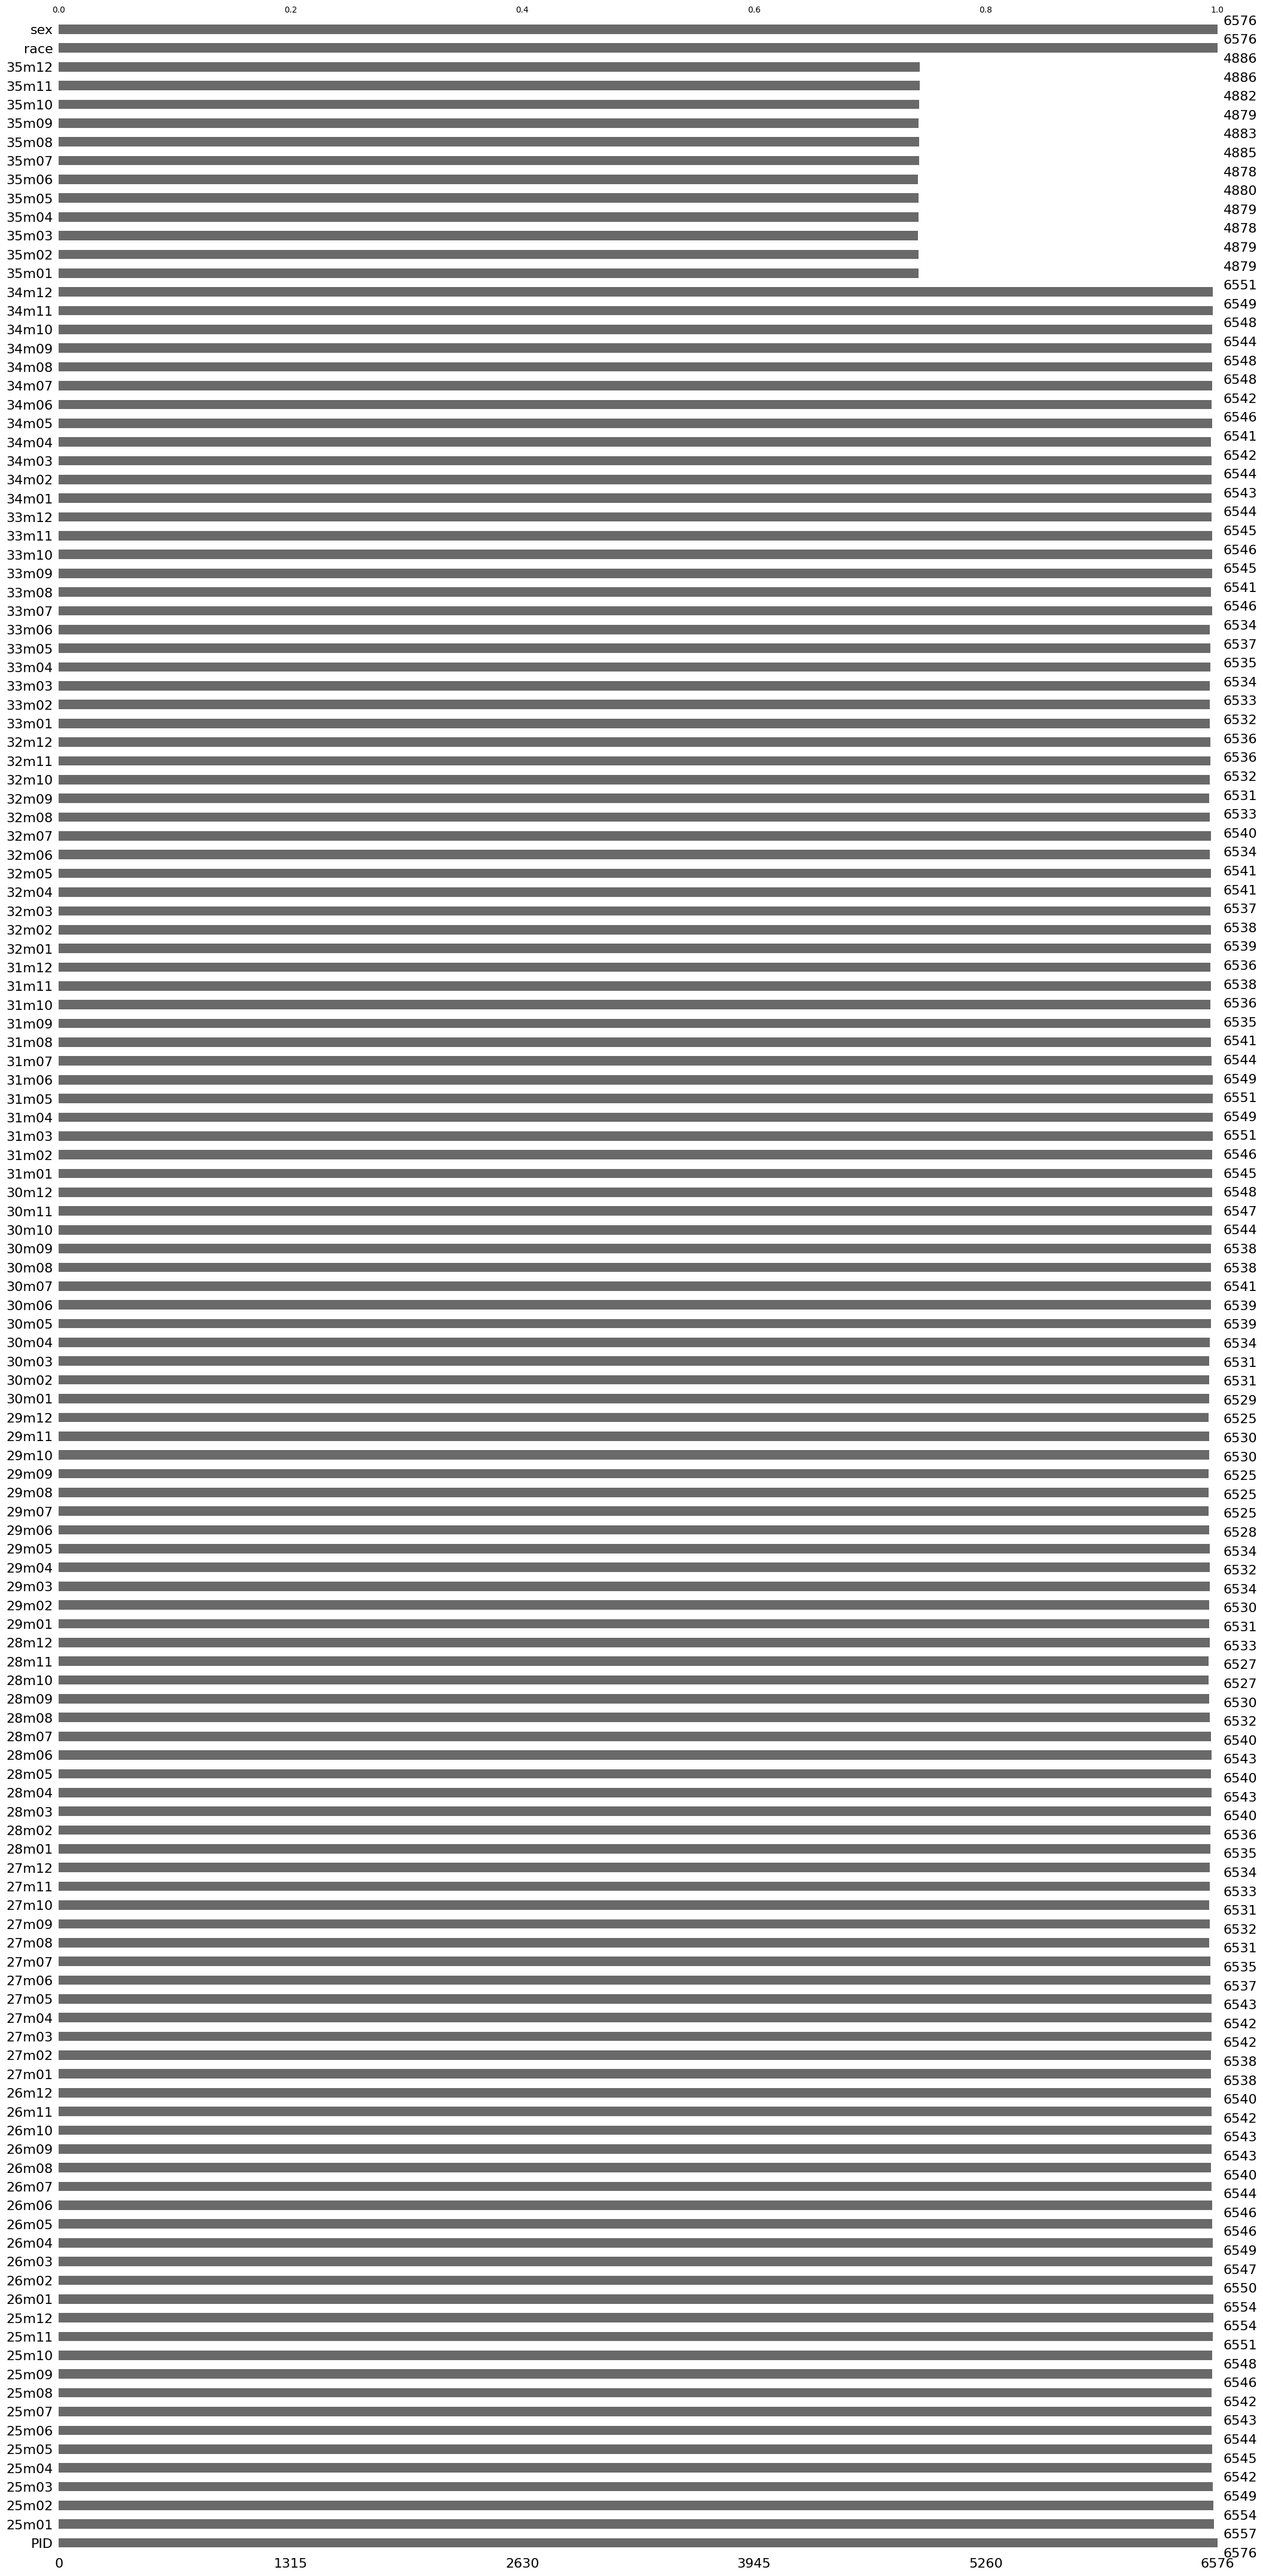

In [4]:
# 用 missingno 的 bar 版本
summarize_missing_values(df, mode='bar', bar_mode='msno')


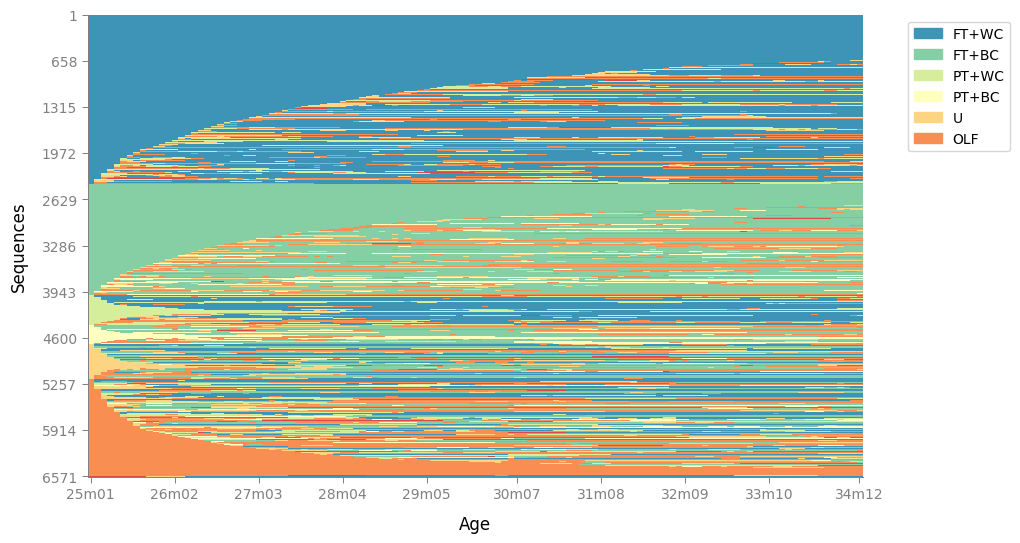

<Figure size 640x480 with 0 Axes>

In [6]:
plot_sequence_index(sequence_data, xlabel='Age')
# order

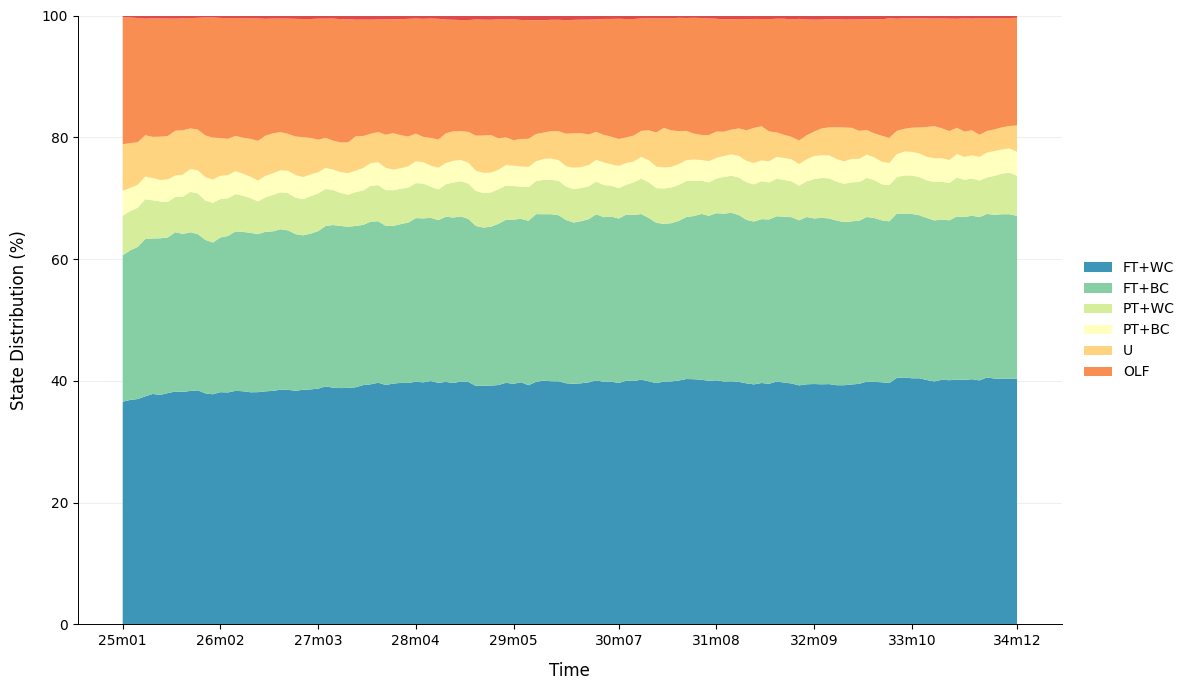

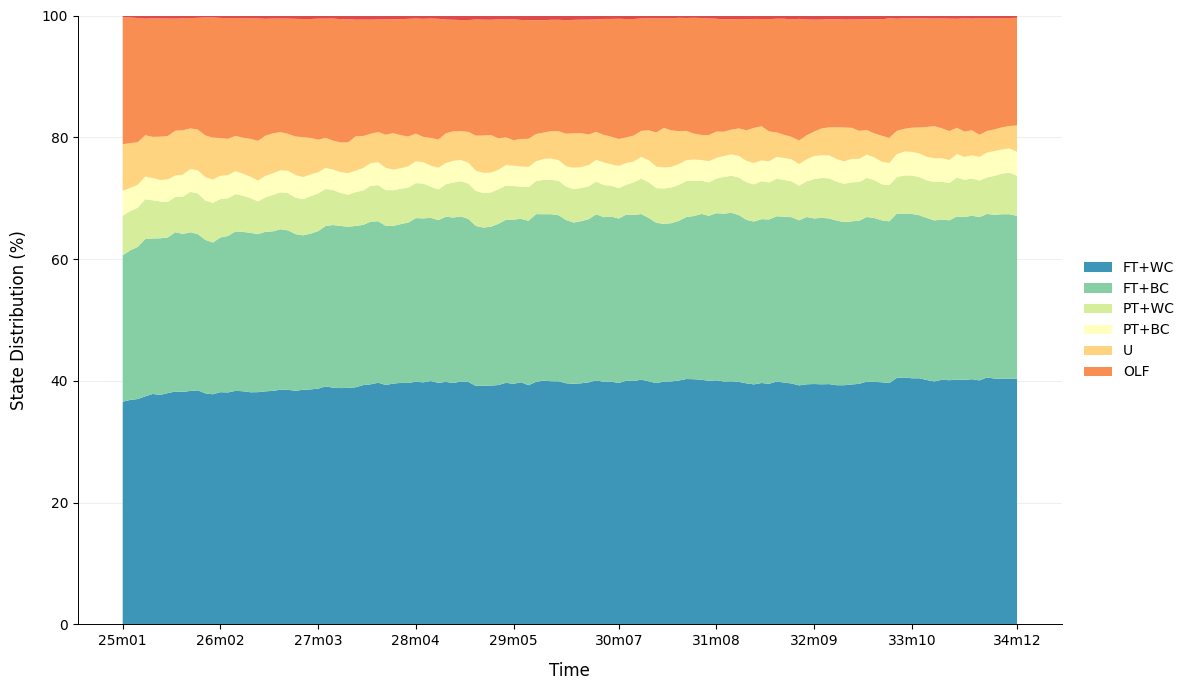

In [4]:
plot_state_distribution(sequence_data)

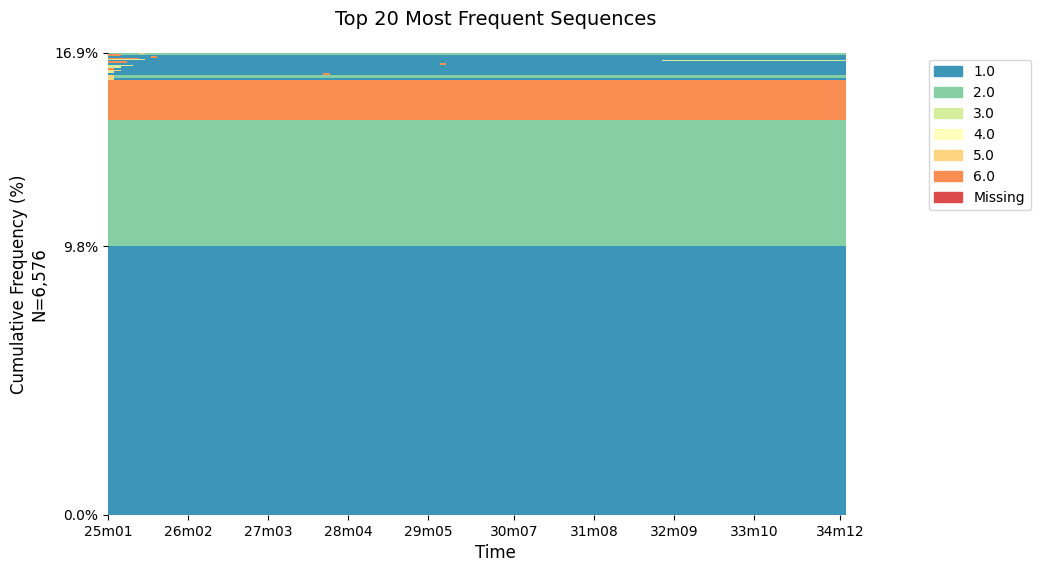

<Figure size 640x480 with 0 Axes>

In [17]:
plot_most_frequent_sequences(sequence_data, save_as='test', top_n=20)
for the most top 3 sequences, they don't switch their states. They are working full time +white collar or full-time + blue collar, and part-time white-collar.

## OMspell

In [18]:
Omspell = get_distance_matrix(seqdata=sequence_data,
                                    method = 'OMspell',
                                    expcost = 0.5, indel =2,
                                    sm= "TRATE", with_missing=True)

[>] Processing 6576 sequences with 7 unique states.
[>] Transition-based substitution-cost matrix (TRATE) initiated...
  - Computing transition probabilities for: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, Missing]
[>] Indel cost generated.


C:\Sohee\2025 spring\sequenzo\.venv\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


[>] Identified 5415 unique spell sequences.
[>] Sequence spell length: min/max = 1 / 41.

[>] Starting Optimal Matching with spell(OMspell)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


In [19]:
Omspell

,0,1,2,3,4,5,6,7,8,9,...,6566,6567,6568,6569,6570,6571,6572,6573,6574,6575
0,0.000000,126.500000,70.500000,0.000000,76.000000,132.967834,53.000000,61.000000,83.500000,18.000000,...,121.000000,121.000000,135.946243,87.000000,137.446243,140.446243,137.446243,126.946243,142.500000,81.000000
1,126.500000,0.000000,87.827506,126.500000,91.272173,115.254061,115.500000,112.500000,103.893245,126.445834,...,143.416288,143.416288,84.454616,87.347930,62.946243,106.845625,96.787193,123.298351,57.718008,106.339080
2,70.500000,87.827506,0.000000,70.500000,36.446243,120.350024,71.445834,49.500000,65.945834,63.500000,...,137.416288,137.416288,107.306765,66.272582,108.892487,115.826339,115.870904,128.298351,107.892078,50.342232
3,0.000000,126.500000,70.500000,0.000000,76.000000,132.967834,53.000000,61.000000,83.500000,18.000000,...,121.000000,121.000000,135.946243,87.000000,137.446243,140.446243,137.446243,126.946243,142.500000,81.000000
4,76.000000,91.272173,36.446243,76.000000,0.000000,127.772474,76.000000,49.000000,72.500000,79.000000,...,138.916288,138.916288,111.847685,64.915245,120.246398,115.238317,126.182217,132.798351,116.340684,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6571,140.446243,106.845625,115.826339,140.446243,115.238317,84.380096,139.392487,136.392487,135.787308,139.339897,...,125.500000,125.500000,79.420390,125.360321,81.916288,0.000000,79.880096,96.500000,109.834712,133.328154
6572,137.446243,96.787193,115.870904,137.446243,126.182217,70.320512,130.414077,134.414077,132.787308,136.339897,...,92.500000,92.500000,98.353644,124.327188,81.848930,79.880096,0.000000,75.465774,101.752967,131.256309
6573,126.946243,123.298351,128.298351,126.946243,132.798351,78.880096,125.914077,122.967834,126.327506,125.893654,...,39.000000,39.000000,105.832577,118.882062,108.332577,96.500000,75.465774,0.000000,131.332577,130.809942
6574,142.500000,57.718008,107.892078,142.500000,116.340684,123.292388,137.500000,134.500000,127.946243,137.446243,...,149.416288,149.416288,88.454616,118.338321,58.880096,109.834712,101.752967,131.332577,0.000000,125.287308


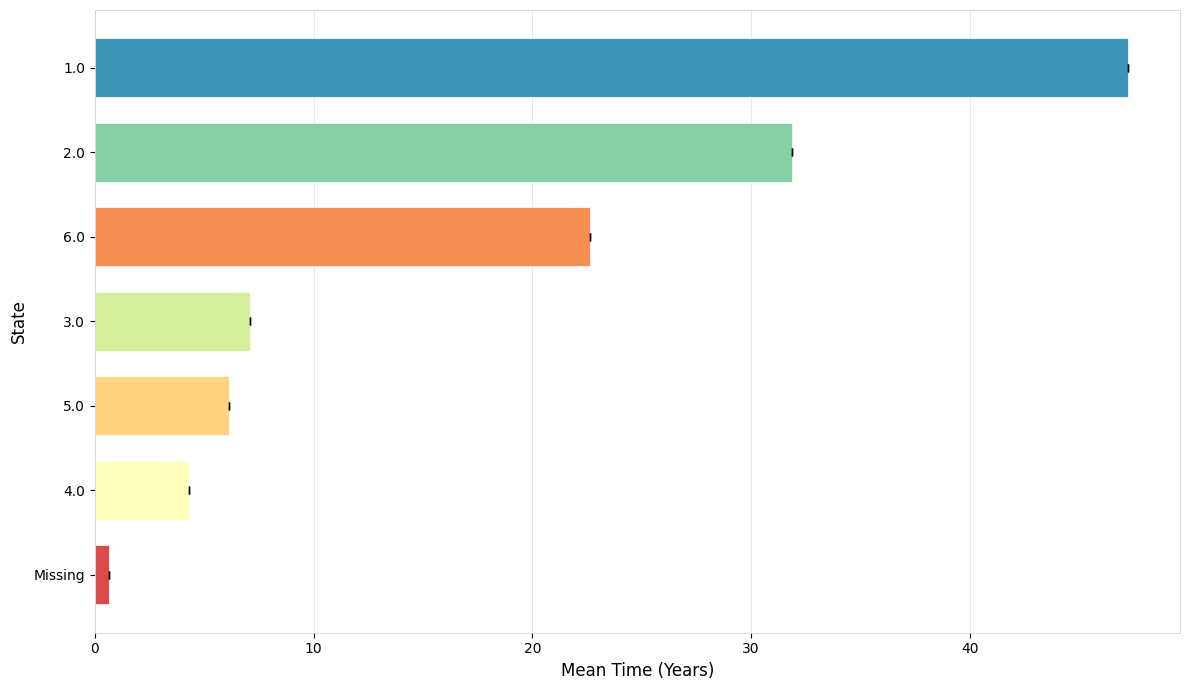

<Figure size 640x480 with 0 Axes>

In [20]:
plot_mean_time(sequence_data, save_as='mean_time')

[>] Converting DataFrame to NumPy array...


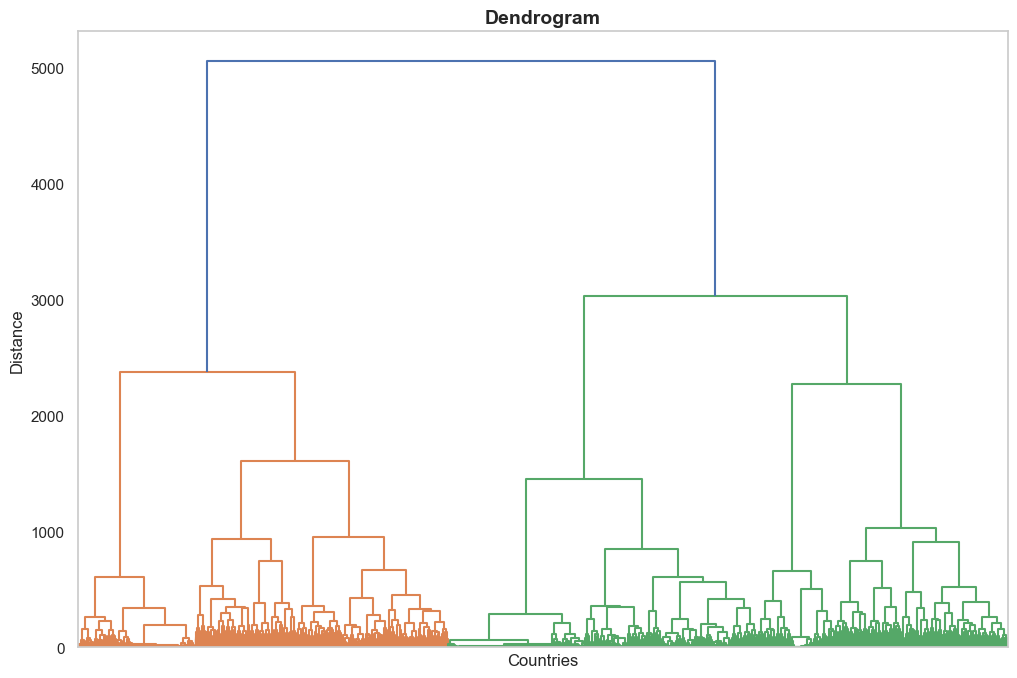

<Figure size 640x480 with 0 Axes>

In [22]:

cluster = Cluster(Omspell, sequence_data.ids, clustering_method='ward')
cluster.plot_dendrogram(xlabel="Countries", ylabel="Distance")
# Hierarchical: combine similar individuals together (bottom-up), stable, calculate variation, how you two get combined as a branch based on variation
# PAM: several dots, how many clusters you want (k-medoid choose the distance that minimize the distance between local nods), randomly choose one.
# kmean: doesn't identify real representative nods


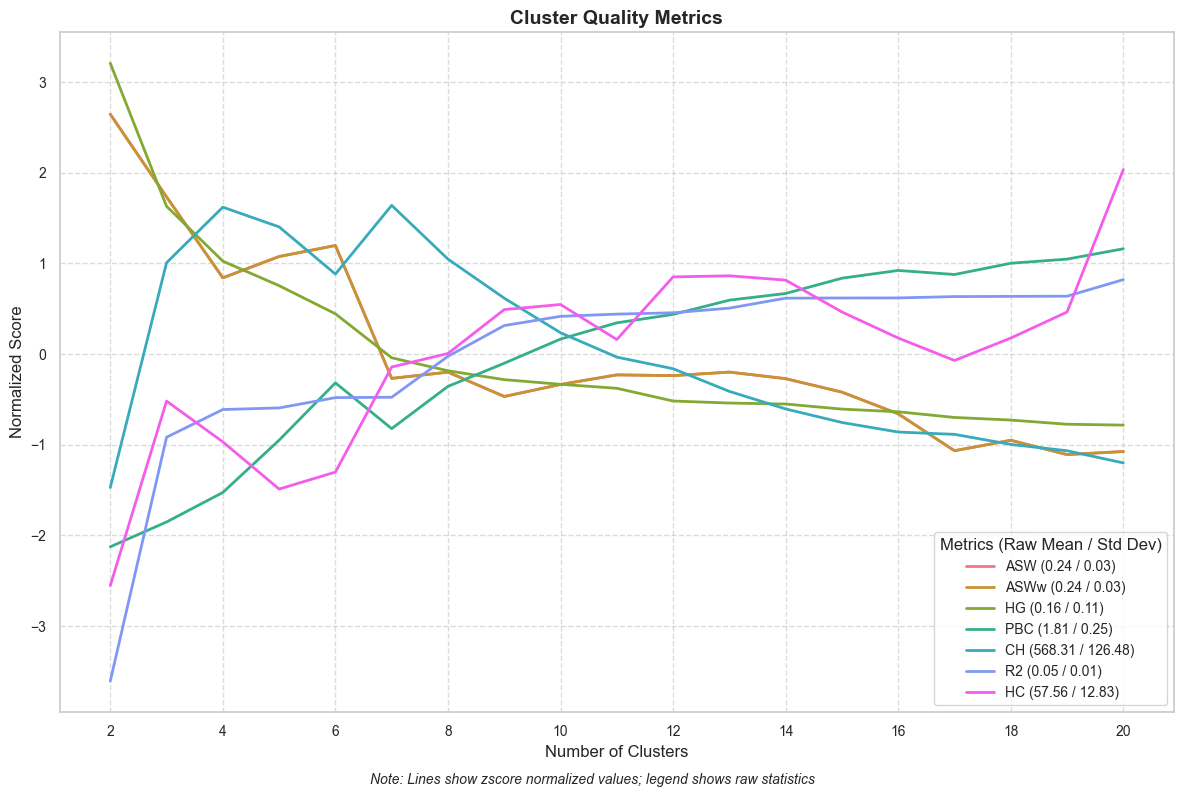

  Metric  Opt. Clusters  Opt. Value  Z-Score Norm.  Min-Max Norm.
0    ASW              2    2.645115       2.645115            1.0
1   ASWw              2    2.645115       2.645115            1.0
2     HG              2    3.207421       3.207421            1.0
3    PBC             20    1.160926       1.160926            1.0
4     CH              7    1.639663       1.639663            1.0
5     R2             20    0.820409       0.820409            1.0
6     HC             20    2.035233       2.035233            1.0


<Figure size 640x480 with 0 Axes>

In [23]:
# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_combined_scores(norm='zscore', save_as='combined_scores')
summary_table = cluster_quality.get_metrics_table()
print(summary_table)

      Entity ID  Cluster ID
0             0           3
1             1           2
2             2           3
3             3           3
4             4           3
...         ...         ...
6571       6571           2
6572       6572           2
6573       6573           1
6574       6574           2
6575       6575           3

[6576 rows x 2 columns]
   Cluster  Count  Percentage
0        1    834       12.68
1        2   1782       27.10
2        3   2197       33.41
3        4   1763       26.81


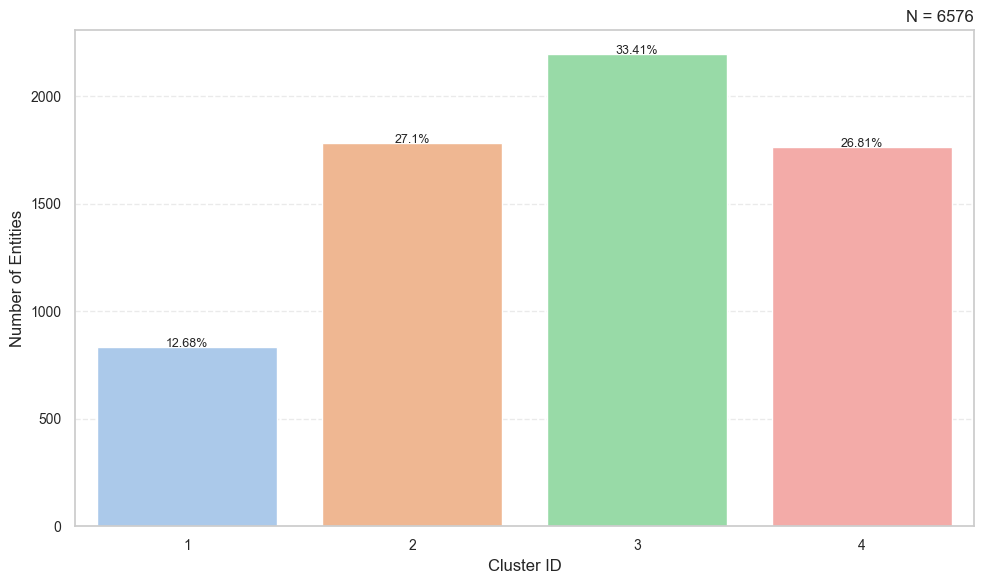

<Figure size 640x480 with 0 Axes>

In [36]:

cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=4)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=4)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=4, save_as="distribution.png", title=None)

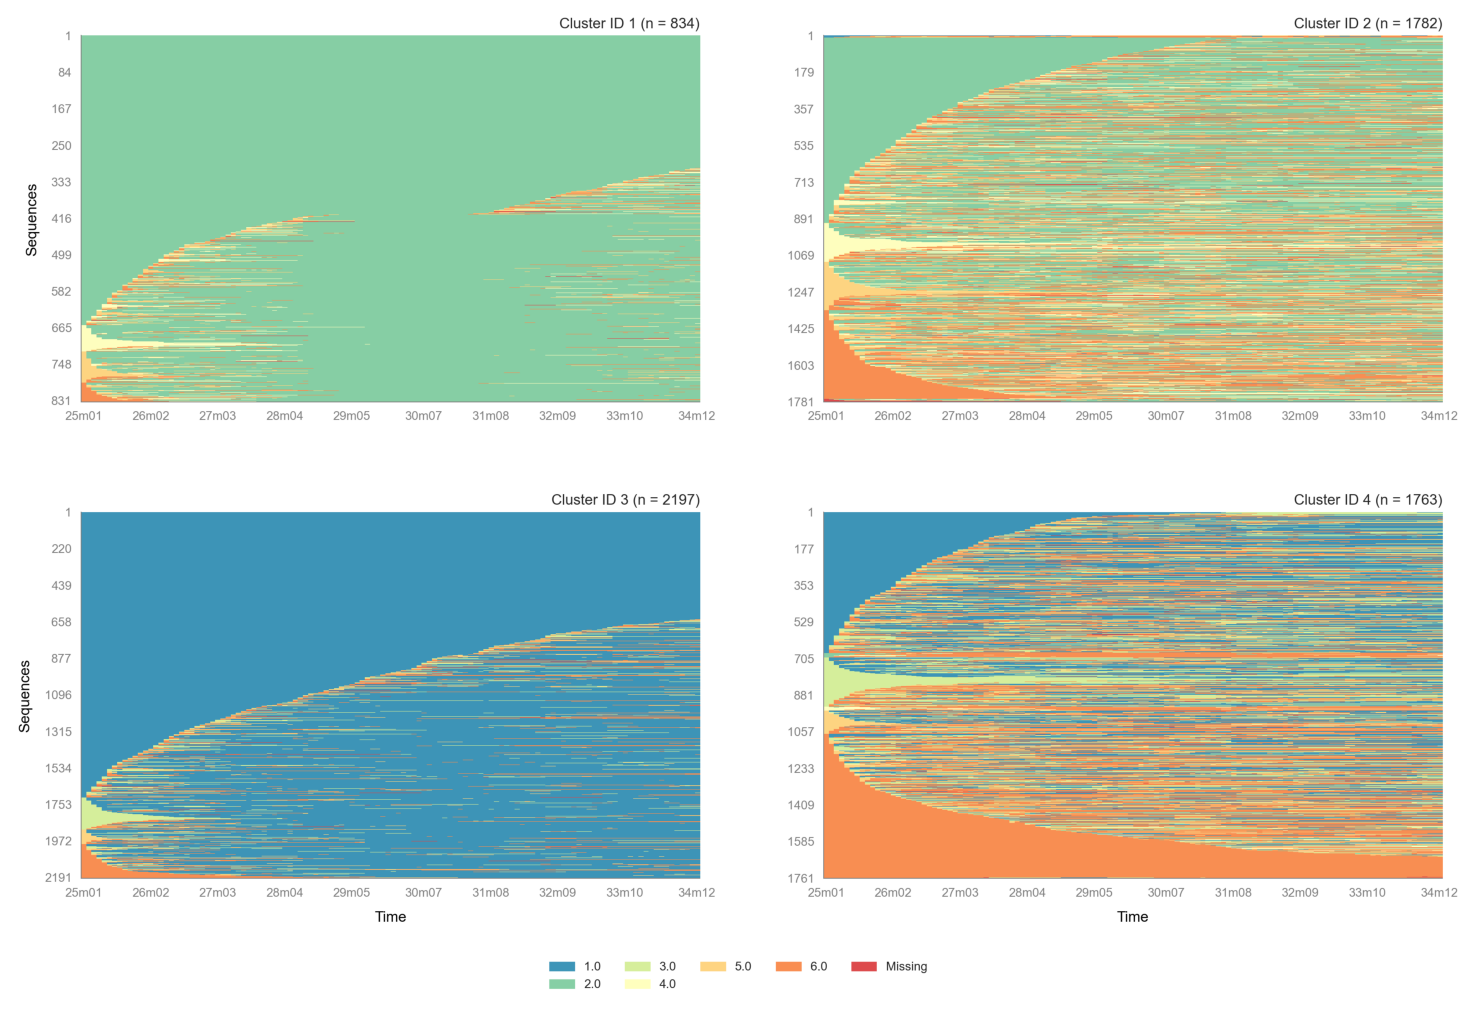

In [37]:
plot_sequence_index(seqdata=sequence_data,
                    id_group_df=membership_table,
                    categories='Cluster ID',
                    nrows=2,
                    ncols=2,
                    save_as='cluster_index_plot_4')


      Entity ID  Cluster ID
0             0           4
1             1           2
2             2           4
3             3           4
4             4           4
...         ...         ...
6571       6571           2
6572       6572           3
6573       6573           1
6574       6574           2
6575       6575           4

[6576 rows x 2 columns]
   Cluster  Count  Percentage
0        1    834       12.68
1        2    712       10.83
2        3   1070       16.27
3        4   2197       33.41
4        5    545        8.29
5        6   1218       18.52


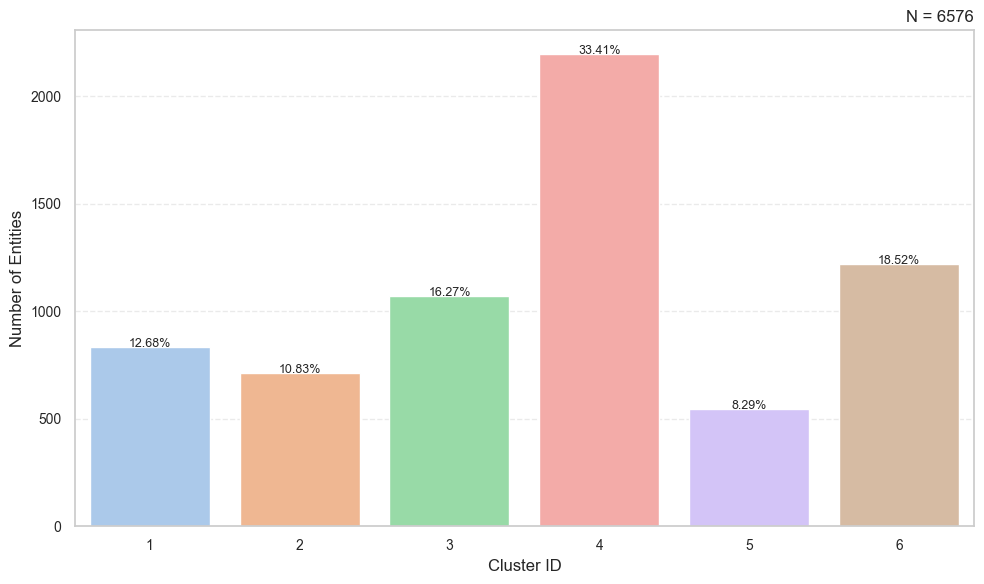

<Figure size 640x480 with 0 Axes>

In [28]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=6)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=6)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=6, save_as="distribution.png", title=None)

      Entity ID  Cluster ID
0             0           4
1             1           2
2             2           4
3             3           4
4             4           4
...         ...         ...
6571       6571           2
6572       6572           3
6573       6573           1
6574       6574           2
6575       6575           4

[6576 rows x 2 columns]
   Cluster  Count  Percentage
0        1    834       12.68
1        2    712       10.83
2        3   1070       16.27
3        4   2197       33.41
4        5    545        8.29
5        6   1218       18.52


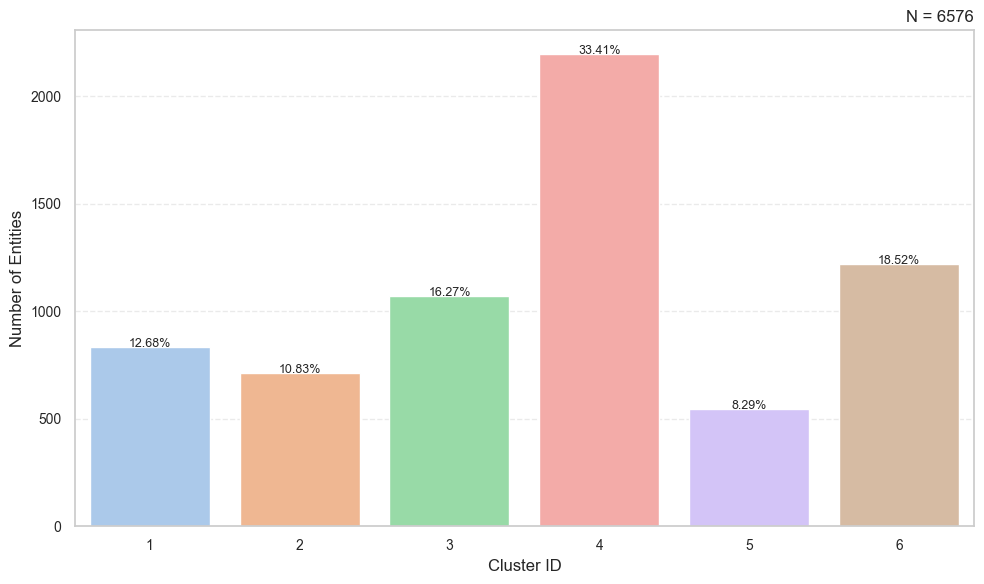

<Figure size 640x480 with 0 Axes>

In [32]:
cluster_results = ClusterResults(cluster)
membership_table = cluster_results.get_cluster_memberships(num_clusters=6)
print(membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=6)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=6, save_as="distribution.png", title=None)

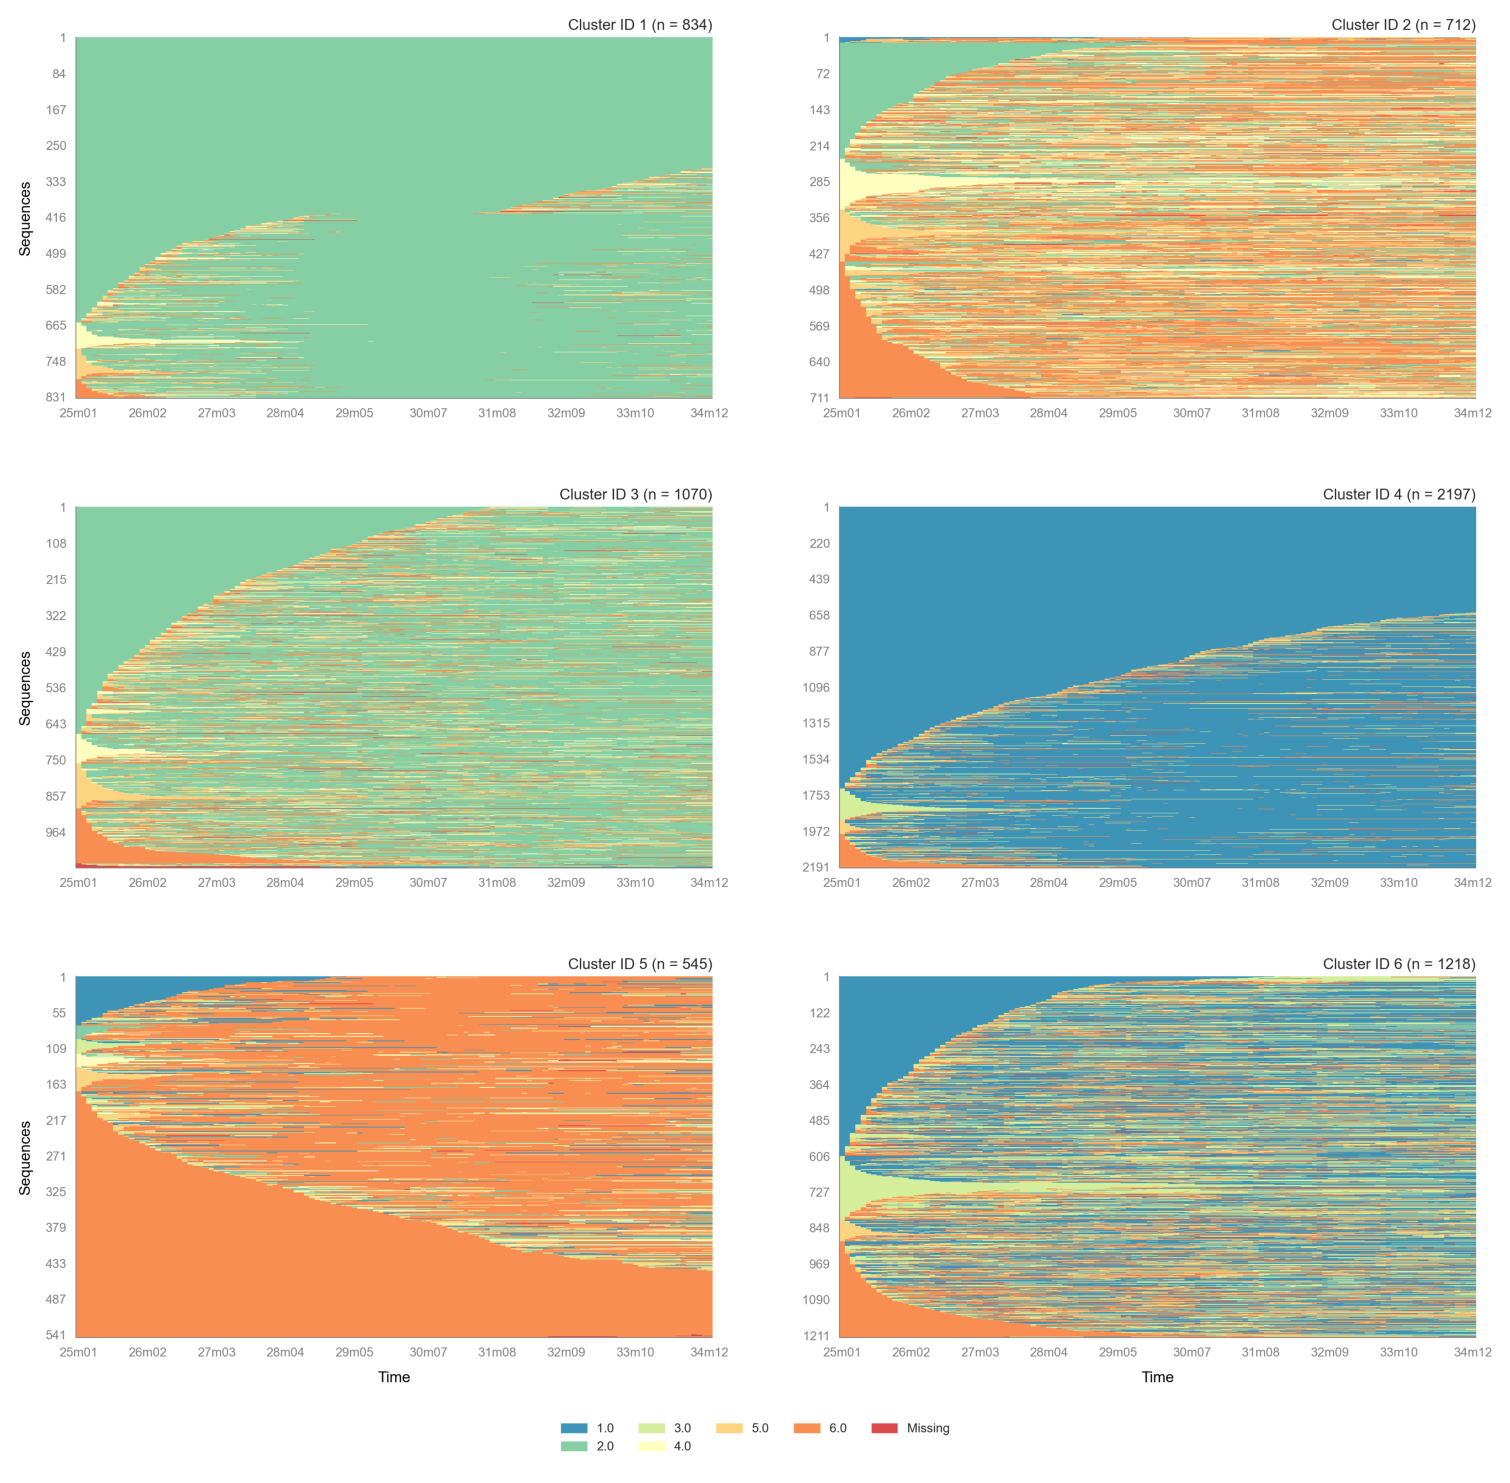

In [34]:
plot_sequence_index(seqdata=sequence_data,
                    id_group_df=membership_table,
                    categories='Cluster ID',
                    nrows=3,
                    ncols=2,
                    save_as='cluster_index_plot_6')

## wald cluster

In [ ]:
cluster = Cluster(Omspell, sequence_data, clustering_method='PAM')
